# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [3]:
# carregamento da base
car_base = pd.read_csv('car_data.csv')

In [4]:
car_base.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
# verificação de valores vaziu ou nulo
total_nulos = car_base.isnull().sum().sum()
total_vazios = (car_base == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 0
Total de campos vazios: 0


In [7]:
# Retira a coluna User ID
car_base = car_base.drop(columns=['User ID'])

# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [8]:
Label_Enconder = LabelEncoder()
car_base['Gender'] = Label_Enconder.fit_transform(car_base['Gender'])
car_base

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

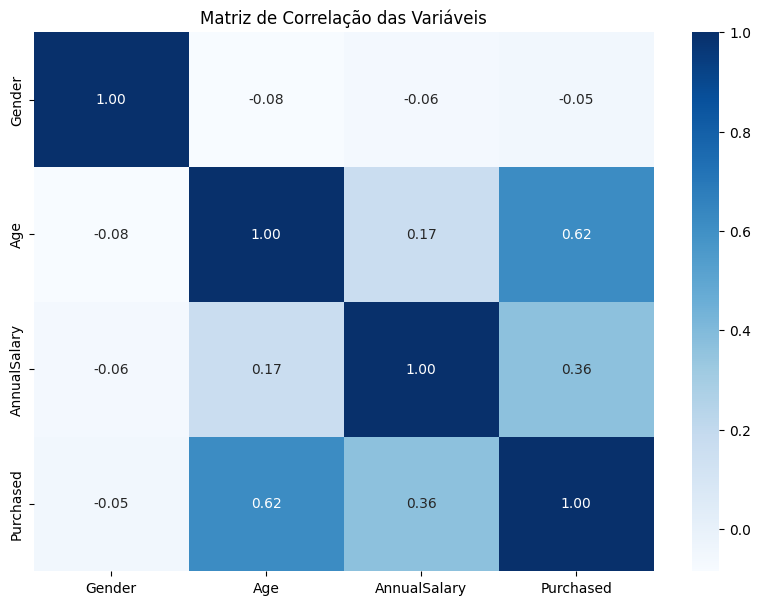

In [9]:
cols = [
    'Gender',
    'Age',
    'AnnualSalary',
    'Purchased'
    ]

df_corr = car_base[cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis")
plt.show()

As colunas que apresentam a maior correlação são todas com excessão a Gender.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [10]:
X = car_base.drop(columns=['Purchased'])
y = car_base['Purchased']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [12]:
svm_model = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=1)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [22]:
Y_pred = svm_model.predict(X_train)

In [21]:
report = classification_report(y_train, Y_pred)
print("Relatório de Classificação:\n", report)
accuracy = accuracy_score(y_train, Y_pred)
print("Acurácia:", accuracy)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       448
           1       0.82      0.74      0.78       302

    accuracy                           0.83       750
   macro avg       0.83      0.81      0.82       750
weighted avg       0.83      0.83      0.83       750

Acurácia: 0.8293333333333334


# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [16]:
svm_model_poly = SVC(kernel =  'poly', random_state = 1, C = 1.0)
svm_model_poly.fit(X_train,y_train)

SVC(kernel='poly', random_state=1)

In [23]:
Y_pred_poly = svm_model_poly.predict(X_train)

In [20]:
report = classification_report(y_train, Y_pred_poly)
print("Relatório de Classificação:\n", report)
accuracy = accuracy_score(y_train, Y_pred_poly)
print("Acurácia:", accuracy)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.95      0.81       448
           1       0.85      0.40      0.55       302

    accuracy                           0.73       750
   macro avg       0.78      0.68      0.68       750
weighted avg       0.76      0.73      0.70       750

Acurácia: 0.732


# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

O Melhor modelo que se provou melhor foi o Modelo SVM Linear com uma accurácia de 0.82 contra o Poly de 0.73, além da precissão, recall e F1-score se saiu superio.

Com o XGBoost, ele se mostrou melhor que o SVM Linear
O XGBoost teve uma accurácia de 0.89, se mostrando melhor nos resultado e nos outros metos também se saiu superior como mostra abaixo :

RELATÓRIO DE CLASSIFICAÇÃO:



               precision    recall  f1-score   support

           0       0.92      0.91      0.91       150
           1       0.86      0.88      0.87       100

    accuracy                           0.90       250
    macro avg      0.89      0.89      0.89       250
    weighted avg   0.90      0.90      0.90       250